In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
os.listdir()

['False_02',
 '200_normal',
 'False_10',
 'plotQ1.ipynb',
 'normal_pre',
 '200_defense',
 'normal_no_pre',
 'True_10',
 'SAC_Laser_Hockey_NORMAL-t10000-alpha1-alpha_tuningTrueidx10-stat.pkl']

In [2]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
file_name = ["True_10","False_10","normal_pre"]
data = []
for name in file_name:
    with open(name,"rb") as f:
        data.append(pickle.load(f))
label=["Single Q w/ tuning", "Single Q w/o tuning", "Double Q"]

In [16]:
def win_rate(r):
    N = len(r)
    
    rate = np.zeros(N)
    for i, rr in enumerate(r):
        if i < 1000 :
            mask = np.sum(r[:i+1] > 0)
            rate[i] = mask / (i+1)
        else:
            mask = np.sum( r[i-999:i+1] > 0)
            rate[i] = mask / (1000.)
    return rate


In [32]:
def step_fun(num):
    return 1 - (0.95 - num/10)/2
step_fun(8)

0.925

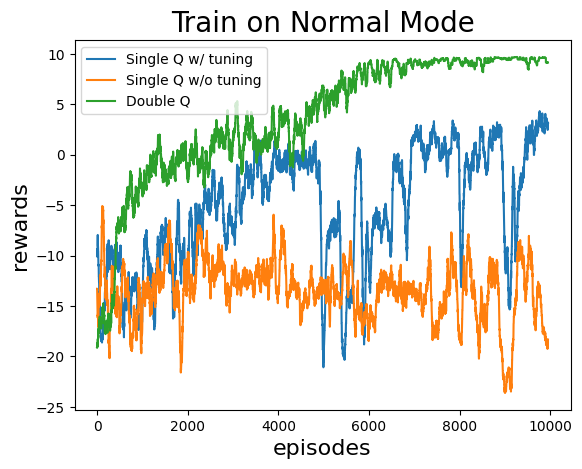

In [4]:


for i,d in enumerate(data):
    r = running_mean(d["rewards"],50)
    plt.plot(r,label=label[i])
plt.title("Train on Normal Mode",fontsize=20)

plt.xlabel("episodes",fontsize=16)
plt.ylabel("rewards",fontsize=16)
plt.legend()
